# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

#### Health is a crucial part of everyone’s life. 
However, owing to multiple reasons like unhealthy lifestyles, work stress, psychological strain, and external factors such as pollution, hazardous work environment, and lack of proper health services, millions of people worldwide fall prey to chronic ailments like heart diseases (CVD), which affect both the heart and blood vessels, resulting in death or disability. In recent years, it was reported that the majority of human deaths were due to CVD. The associated conditions are hypertension, thromboembolism, hyperlipidaemia, and coronary heart disease, which culminate in heart failure. Hypertension is the primary cause of CVD. In 2012, 7.4 million people were reported to have died from coronary heart disease, while 6.7 million people died from stroke. The World health Organization estimates that nearly 17 million people die every year from CVDs, which accounts for approximately 31% of global deaths. Early diagnosis of CVD can potentially cure patients and save innumerable lives. Diagnosis and treatment of patients at early stages by cardiologists remain a challenge. Every traditional CVD risk-assessment model implicitly assumes each risk factor related to CVD outcome in a linear fashion. Such models have a tendency to oversimplify complex relationships, including several risk factors with non-linear interactions. Multiple risk factors should be properly incorporated, and more correlated nuances between the risk factors and outcomes should be determined. To date, no large-scale study has used routine clinical data and machine learning (ML) in prognostic CVD assessment. The goal of this study is to determine if ML can enhance cardiovascular risk prediction accuracy in population primary care at large and find out which ML algorithm result had fairly high brevity. In recent years, multiple ML-based CVD detection models have been proposed. A review of previous studies is presented to identify the research problem and objective of each study. ML helps a cardiologist to predict diseases at an early stage and treat the patient accordingly. There are many ML techniques such as support vector machines, artificial neural networks, decision trees, and K-Nearest Neighbour (K-NN), each with its strengths and weaknesses. These methods have been applied in broader areas like in predicting liver, human heart (echocardiogram signals), and skin diseases. Results of each technique differ owing to several constraints. Observations from related studies reveal that there is further scope for the development of automated CVD detection using other ML models that provide improved performance. This study contains an in-depth statistical analysis of input data sets to understand the effects of data range on the CVD predictions. It includes a correlation study of categorical and continuous features of patients. In addition, data visualization and scatter plots for pairs of important features were obtained to understand the significance of the correlation between important features.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


The data set contains both categorical and continuous features as explained in Figures 3 and ​and4.4. The data set consists of patients between the ages of 29 and 77. Pandas, NumPy, sklearn and matplotlib python libraries were used to analyse and visualize the data. 
These standard and reliable methods were employed for binary classification (CVD or no CVD).

1. KNeighborsClassifier
2. RandomForestClassifier
3. Logistic Regression
4. MLP


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('dataset.csv')

In [48]:
df.shape

(303, 14)

##### The dataset contains 303 samples and 13 important test attributes.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Feature Selection

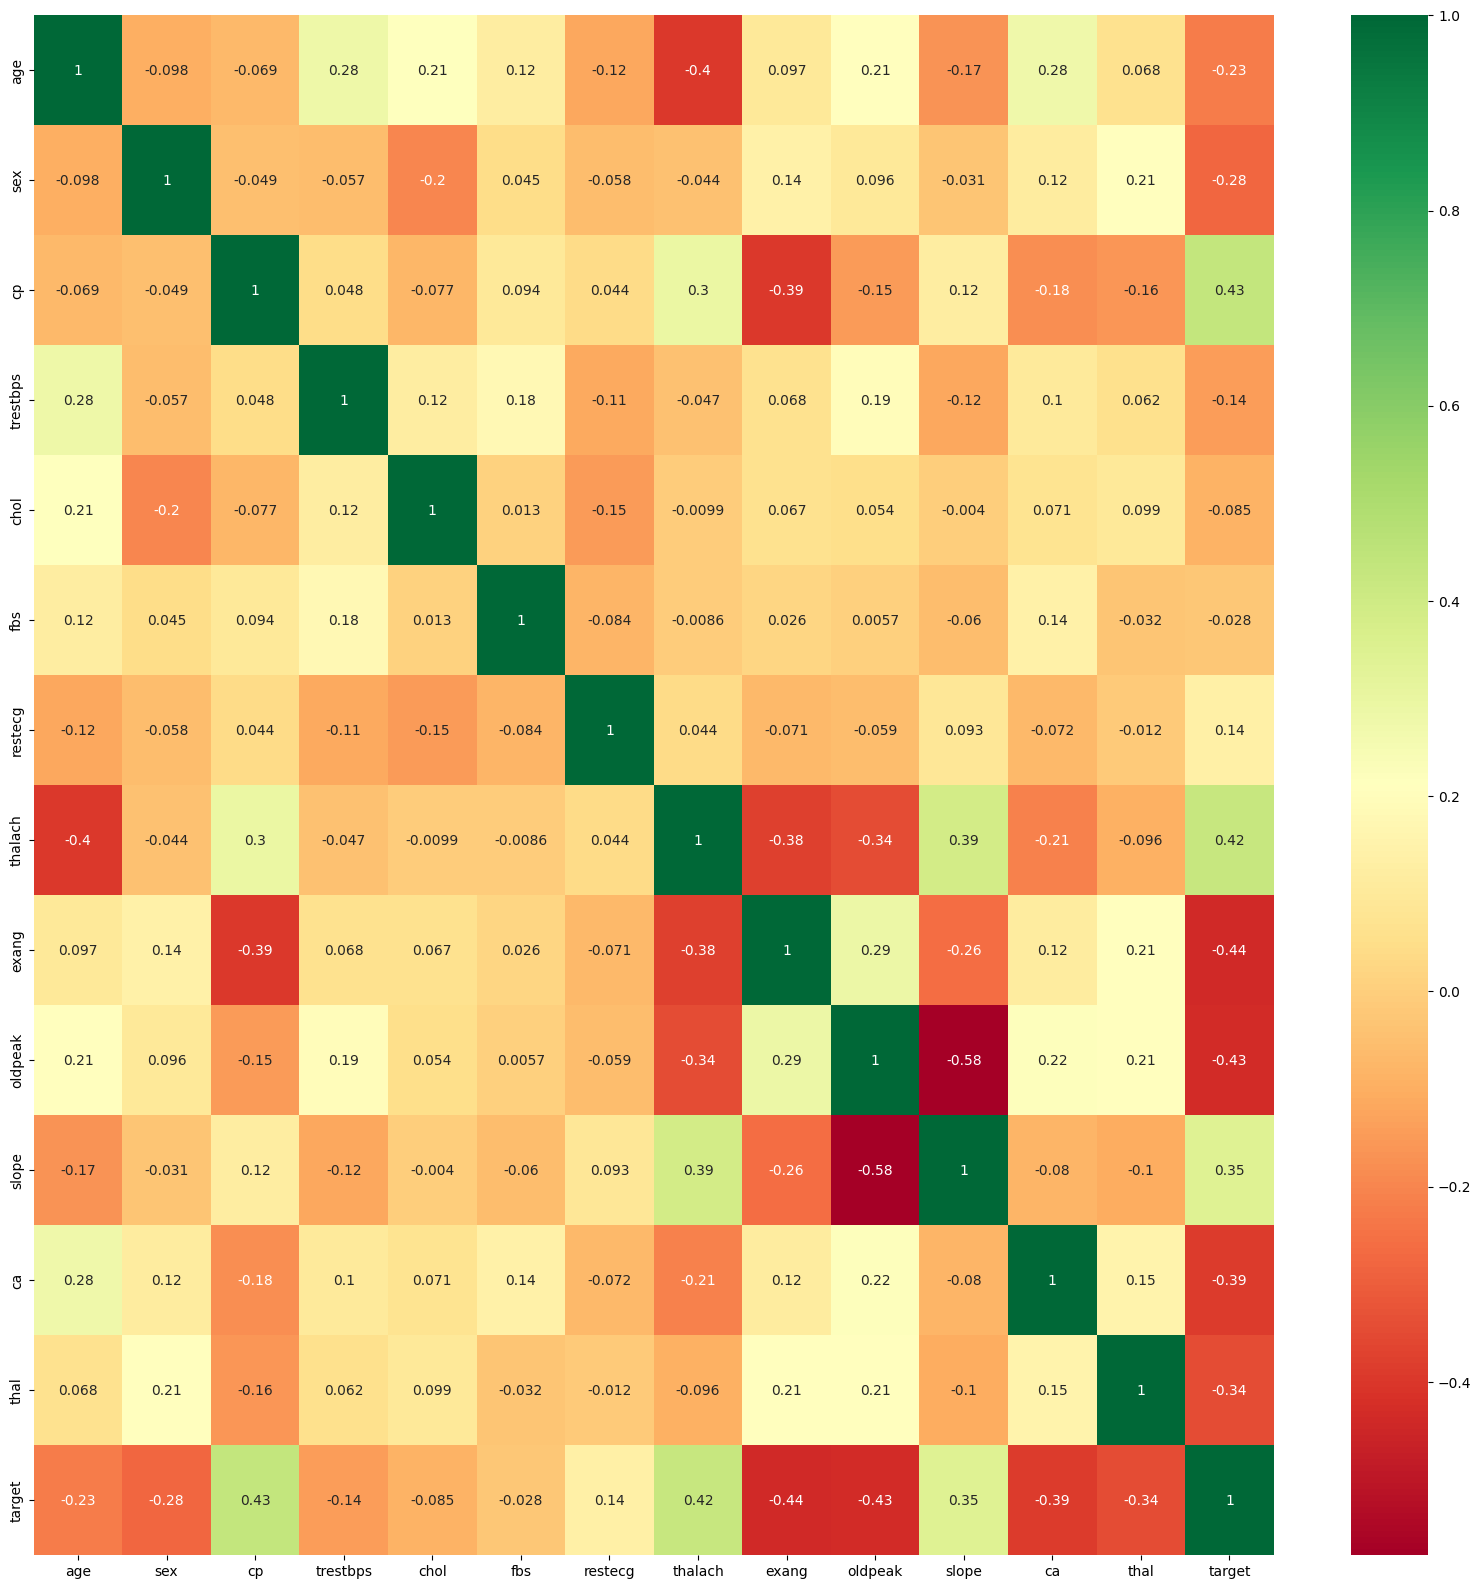

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

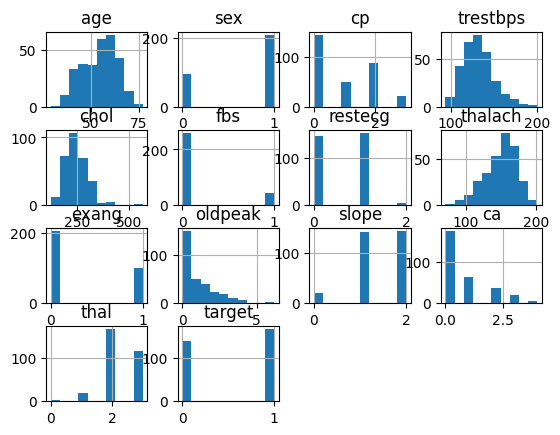

In [11]:
df.hist()

<Axes: xlabel='target', ylabel='count'>

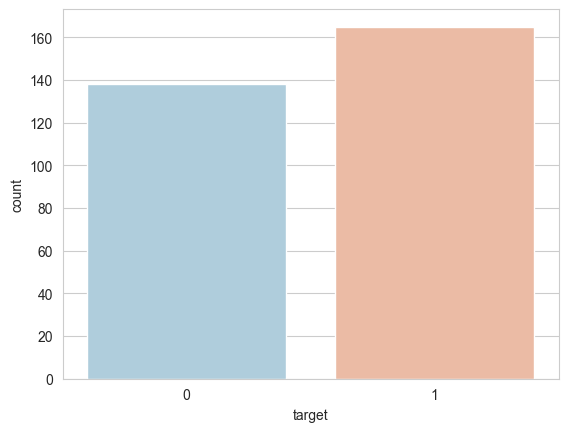

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

#### Our target value taken is whether a person has CVD (near to 1) or does not have CVD (close to 0). The data set was imbalanced as 165 patients had CVD and 138 patients were normal 

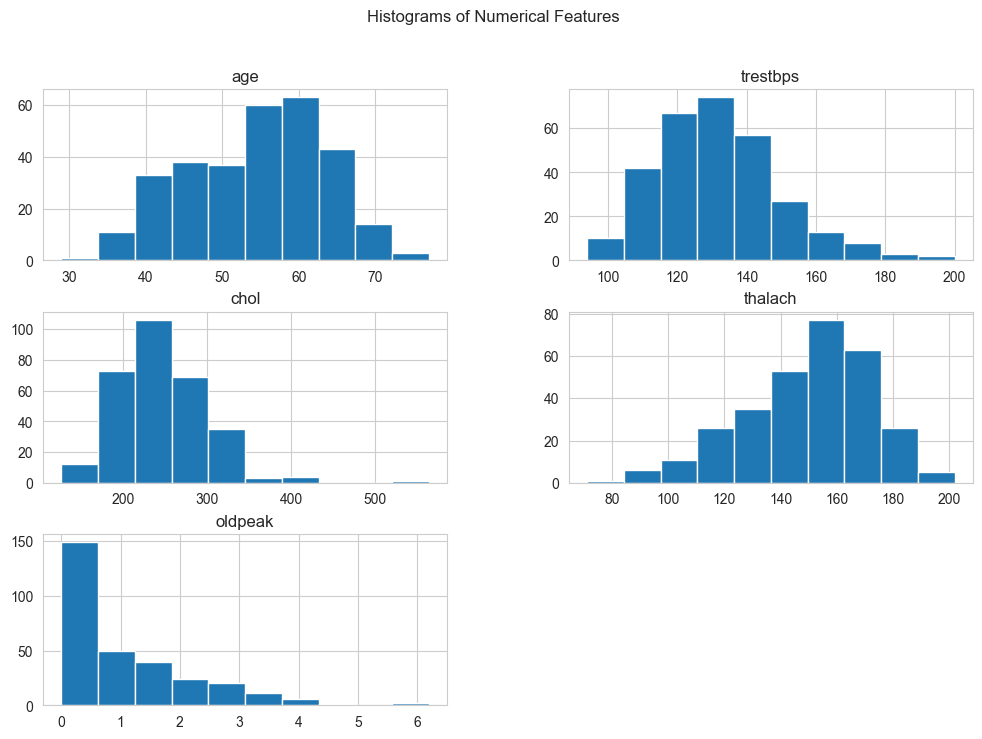

In [13]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


In [51]:
import plotly.express as px

# Pie chart of CP (Chest Pain Type) with target variable using Plotly
fig = px.pie(df, names='cp', color='target', title='Distribution of Heart Disease by Chest Pain Type',
             labels={'cp': 'Chest Pain Type', 'target': 'Heart Disease'}, color_discrete_map={0: 'blue', 1: 'orange'})
fig.show()


<Figure size 1200x800 with 0 Axes>

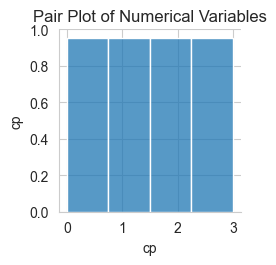

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample CVD dataset (replace this with your actual dataset)
# Assuming you have numerical variables in your dataset
# Remove non-numerical variables such as 'sex' and 'cp' for pairplot
df_numerical = df.drop(['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1)

# Plot pairplot using seaborn
plt.figure(figsize=(12, 8))
sns.pairplot(df_numerical)
plt.title('Pair Plot of Numerical Variables')
plt.show()


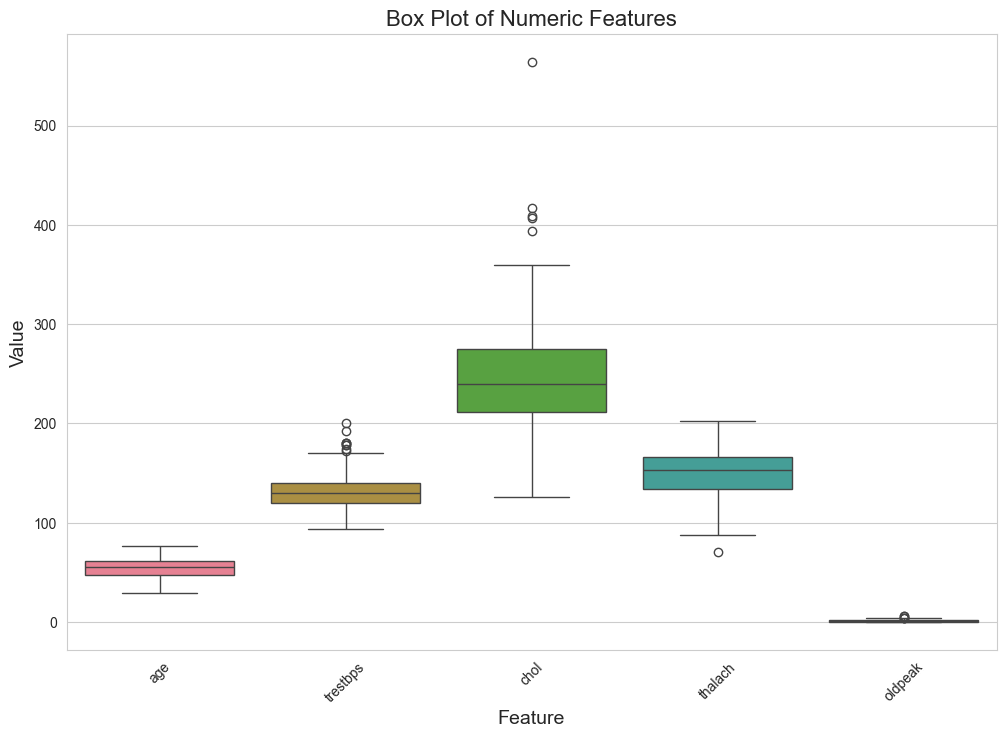

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish background
sns.set_style("whitegrid")

# Define a color palette
colors = sns.color_palette("husl")

# Plot box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], palette=colors)
plt.title('Box Plot of Numeric Features', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.show()

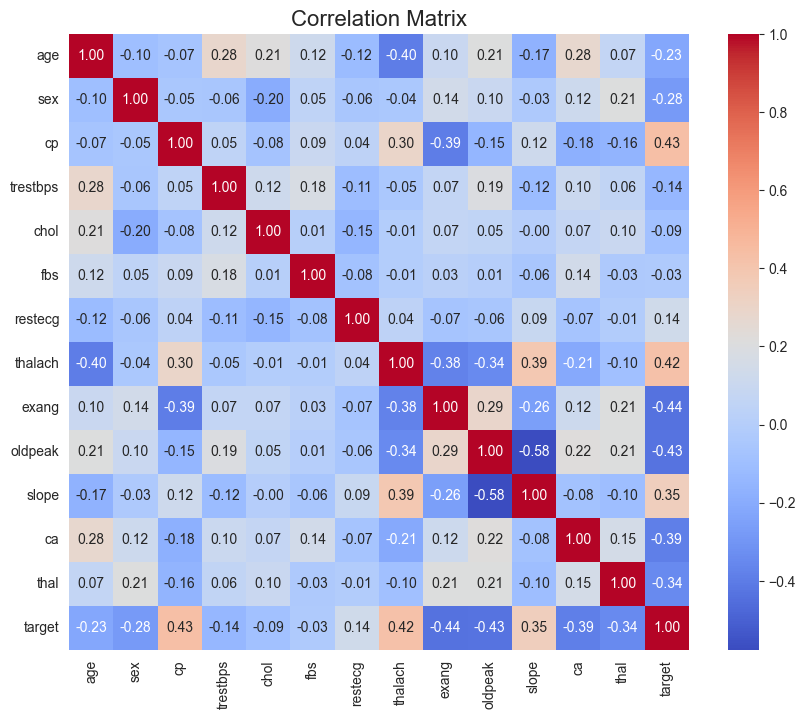

In [16]:


# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

##### Pre-processing of the data set, certain categorical variables such as cp, sex, chol, and trestbps are converted into dummy variables, and the resultant data are scaled before training the ML models.

In [17]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [19]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [20]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

## KNeighbour Classifier

##### K-NN is a non-parametric classifier used to determine whether a patient has CVD or not using a labelled known data set. Predictions are made based on k numbers of frequently used neighbours for a new object, and a different distance metric for finding the K-NN is used. K-NN classifies new training data points based on similarity measurements. Data points are classified by considering the majority of votes from its neighbours. This works effectively for small dimensional data sets. K-NN does not require extra training for classification if a new data point is added to the existing data set. It is an inefficient algorithm for large data sets and requires more memory space for computation and longer model testing times because of the need to compute the distance between training data set and testing data set during each test.

In [21]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

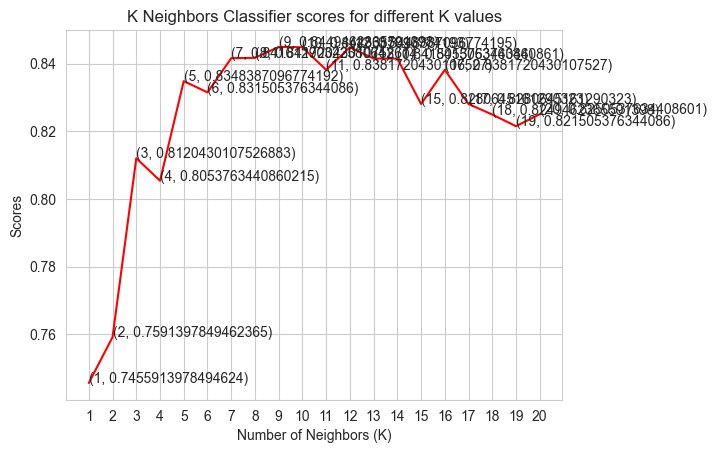

In [22]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [24]:
score.mean()

0.8448387096774195

## Random Forest Classifier

##### The RandomForestClassifier is a popular ensemble learning method used in machine learning, particularly for classification tasks like predicting the presence or absence of Cardiovascular Disease (CVD) in medical datasets. This algorithm builds multiple decision trees during the training phase and combines their predictions to improve the overall accuracy and robustness of the model. Each decision tree in the random forest is trained on a random subset of the training data and a random subset of the features, which helps to reduce overfitting and increase generalization performance. When making predictions, the random forest aggregates the predictions from all individual trees and outputs the majority class as the final prediction. This approach tends to be highly effective in handling complex datasets with nonlinear relationships between features and the target variable, making it well-suited for tasks like CVD prediction where the underlying patterns may be intricate and multifaceted. Additionally, random forests provide insights into feature importance, allowing clinicians to understand which patient characteristics contribute most significantly to the prediction of CVD, aiding in medical decision-making and risk assessment.

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score, classification_report


In [210]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [211]:

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [212]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build the final model
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8688524590163934


### Confusion Matrix
The confusion matrix provides the following interpretation:

True Positives (TP): 28
False Positives (FP): 4
False Negatives (FN): 4
True Negatives (TN): 25

In this case False negatives are more dangerous because they may result in undetected or untreated CVD, leading to missed opportunities for medical intervention and potentially adverse health outcomes, including heart attacks, strokes, or even death.

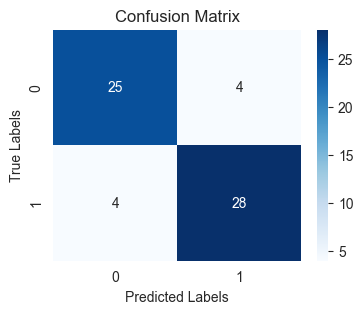

In [215]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))  # Adjust the figsize here
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Logistic Regression

##### Logistic Regression is a statistical model used for binary classification, estimating the probability of a binary outcome based on one or more predictor variables. It assumes a linear relationship between the predictors and outcome.The sigmoid function is a mathematical function used in logistic regression to map input values to probabilities.

In [154]:
from sklearn.linear_model import LogisticRegression


In [155]:
# Initialize Logistic Regression model
lr = LogisticRegression()

In [156]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [157]:
# Predictions
y_pred = lr.predict(X_test)

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


In [159]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [160]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
}

In [161]:
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [162]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'penalty': 'l2'}


In [163]:
# Use the best parameters to build the final model
best_logistic_regression_model = LogisticRegression(**best_params)
best_logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [198]:
# Predictions
y_pred = best_logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


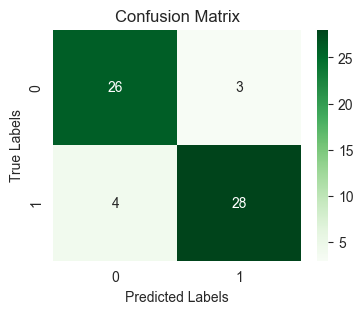

In [199]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## MLP

##### A Multi-Layer Perceptron (MLP) is a type of artificial neural network (ANN) that consists of multiple layers of nodes, or neurons, arranged in a feedforward manner. Each neuron in one layer connects to every neuron in the subsequent layer, forming a densely connected network. MLPs are capable of learning complex relationships between input and output data through a process called training, which involves adjusting the weights and biases of connections between neurons based on the input data and desired output.

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [176]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


In [177]:
# Train the model
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [179]:
# Make predictions
y_pred = mlp.predict(X_test)

In [181]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


In [182]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



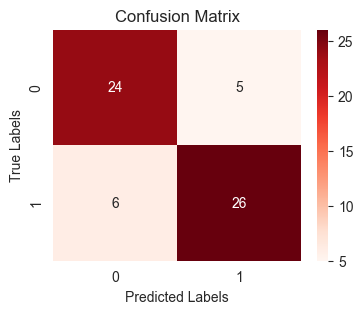

In [185]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Hyperparameter Tuning
It will improve the model's accuracy, generalization, and robustness by selecting the best configuration of parameters such as the number of hidden layers, neurons per layer, activation functions, and learning rates, among others.

In [187]:
# Define the parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [188]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [189]:
# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [190]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [191]:
# Get the best model
best_model = grid_search.best_estimator_

In [192]:
# Evaluate the best model on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [193]:
# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


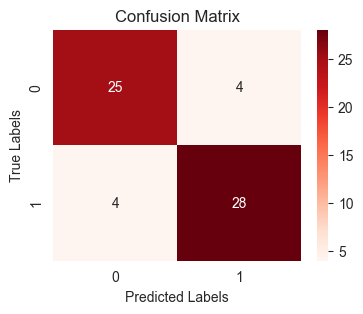

In [195]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [225]:
import plotly.graph_objects as go

# Define the models and their accuracy scores
models = ['KNN', 'Random_Forest', 'Logistic_regression', 'MLP']
accuracy_scores = [84, 87, 89, 87]  # Replace with actual accuracy scores

# Define colors for each bar
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Create data for 3D bar plot
data = []
for model, score, color in zip(models, accuracy_scores, colors):
    data.append(go.Bar(x=[model], y=[score], marker=dict(color=color), name=model))

# Create layout for the plot
layout = go.Layout(title='Accuracy Scores of Different Models',
                   scene=dict(
                       xaxis=dict(title='Models'),
                       yaxis=dict(title='Accuracy Score'),
                       zaxis=dict(title='Accuracy Score'),
                   ))

# Create the figure and add data and layout
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()


### Based on the provided accuracy scores, the logistic regression model has performed better among the four models evaluated. It achieved an accuracy score of 89%, which is the highest among the models listed.The confusion matrix indicates that the logistic regression model correctly classified 26 instances as negative (no CVD) and 28 instances as positive (having CVD). However, it misclassified 3 instances as positive when they were actually negative and 4 instances as negative when they were actually positive. Overall, the model has performed well, with a higher number of correct classifications compared to misclassifications.